In [1]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt

In [2]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

In [3]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

In [29]:
#inspect data

#plot_digit(X, y, 1)

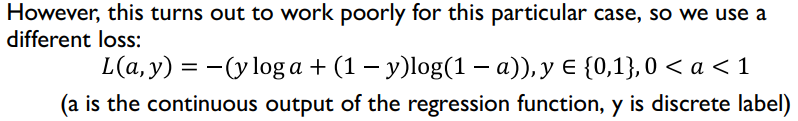

In [30]:
# create a loss function:
def avrLoss(y,a):
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))
  return np.mean(loss)

In [24]:
#test loss function:
#(just run this cell and see what happens)

loss=avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

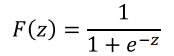

In [25]:
#create a sigmoid
def sigmoid(z):
    F = 1/(1+np.exp(-z))
    return F

In [26]:
#check sigmoid
#(just run this cell and see what happens)
out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [27]:
#make test & train data
Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [ ]:
#train

#INITIATE WEIGHTS AND BIASES (w,b)
w=?
b=?

nEpoch=?

accuracy=np.zeros(nEpoch)
trainRate=#pick a number less than 1

for iTrain in range(nEpoch):
  #evaluate
  #CALCULATE a

  #calculate loss & accuracy
  loss=?

  yhat=a>.5
  accuracy[iTrain]=np.mean(yhat==ytrain)


  #update weights
  wgrad=?
  bgrad=?

  assert(wgrad.shape == w.shape)

  #UPDATE W AND b


  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

In [ ]:
#see what the network does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

In [ ]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()